<a href="https://colab.research.google.com/github/Loga19818eeanvesh/HandWritten_Tamil_Characters_Recognition_by_CNN/blob/main/Tamil_HandWritten_Characters_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading Hand written Tamil Character Dataset.
Source of Data is  HP Labs India.
The dataset contains approximately 300 isolated samples for each of 156 Tamil characters and 50683 images in total written by native Tamil writers. The ClassId given to each Tamil Character is shown in below table.

![picture](https://drive.google.com/uc?export=view&id=13WjQV5fK7Ex7Ygeewxjj2bD4gfah7nF_)

![picture](https://drive.google.com/uc?export=view&id=13FAwBD5wWSDhKBo8wfM3_tYVLViFg3i4)

![picture](https://drive.google.com/uc?export=view&id=13KcqK1vEbtSf1QnfNpUv85HlmoHyFTNm)

![picture](https://drive.google.com/uc?export=view&id=138rGEWIM3lQOAHOKzpUzEM9AHbcopOdq)

![picture](https://drive.google.com/uc?export=view&id=13_me1Hfpq1Tt6LNlhSVtj1KolRr26TNn)

![picture](https://drive.google.com/uc?export=view&id=13R0iCKZvPdiLeArgPqEhBRGBS4jI3wvA)

Untar hpl-tamil-iwfhr06-train-offline.tar.gz data file which is downloaded from HPLabs India Website

In [ ]:
!tar -xvf '/content/hpl-tamil-iwfhr06-train-offline.tar.gz' -C "/root"

Streaming output truncated to the last 5000 lines.
./hpl-tamil-iwfhr06-train-offline/usr_32/036t01.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/082t06.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/051t03.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/085t06.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/012t07.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/020t05.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/087t01.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/019t02.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/060t09.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/106t06.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/069t06.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/006t03.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/013t08.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/017t05.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/135t05.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/037t04.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/091t01.tiff
./hpl-tamil-iwfhr06-train-offline/usr_32/059t02.

Data Preprocessing. Making 156 folders each for each of 156 Tamil characters and copying characters into its respective folder.
The Folder name of a character is same as its class Id given for each character as shown in above table. 

In [ ]:
import os
import shutil

#making a directory /tmp/processedData/
train_target = "/tmp/processedData/"
os.mkdir(os.path.join("/tmp/", "processedData"))

data_dir = "/root/hpl-tamil-iwfhr06-train-offline"

#making 156 subdirectories in /tmp/processedData/ for each character
for i in range(156):
    os.mkdir(os.path.join(train_target, str(i)))

data_count = 0 #to count noof total images in data

#traverse original untar source directory and copy each character file to the subdirectory in /tmp/processedData/ with name same as character class
#Refer python documentation to know how os.walk() works
for root, dirs, files in os.walk(data_dir):
  #print(root)
  #print(dirs)
  #print(files)
  #print("_______________")
  for dir in dirs:
    for dir_root, subdirs, dir_files in os.walk(os.path.join(root, dir)):
      #print(root)
      #print(dirs)
      #print(files)
      #print("_______________")
      for file_name in dir_files:
        file_path = os.path.join(dir_root, file_name)
        char = file_name[:3]
        if char == "Thu":
          continue
        new_name = char + 'L' + dir[4:] + file_name[3:]
        #print(char)
        location = os.path.join(train_target, str(int(char)), new_name)
        shutil.copy(file_path, location)
        data_count += 1

print(data_count)


50683


Now as we have copied all 156 tamil characters images to their respective subfolders in /tmp/processedData/ with name same as classId of character Its time to split data into TrainingSet and TestSet

In [ ]:
training_dir = "/tmp/processedData/training/" 
testing_dir = "/tmp/processedData/testing/"

#make training and testing dirctories as /tmp/processedData/training/ and /tmp/processedData/testing/ respectively
try:

  os.mkdir('/tmp/processedData/training')
  os.mkdir('/tmp/processedData/testing')

  #In training and testing dirctories make subdirctories for each of 156 characters with subfolder names same as charaterter classIds
  for i in range(156):
    os.mkdir(os.path.join(training_dir , str(i)))
    os.mkdir(os.path.join(testing_dir , str(i)))

except OSError:
    pass


In [ ]:

#Function takes SOURCE directory of a character and copies some images of character to TRAINING directory and remaining to TESTING directory as specified by Split_Size

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  files = []

  #Append all filenames in Source directory to files
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  #Calculating training_size and testing_size
  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)

  #shuffle filenames in files list
  shuffled_set = random.sample(files, len(files))


  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  #Copying filenames in training_set to TRAINING Directory
  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)
  
  #Copying filenames in testing_set to TESTING Directory
  for filename in testing_set:
    this_file = SOURCE + filename
    destination = TESTING + filename
    copyfile(this_file, destination)

In [ ]:
#By using above function spliting Data to Training and Testing Sets

split_size = 0.9

source_dir ="/tmp/processedData/"
training_dir = "/tmp/processedData/training/"
testing_dir = "/tmp/processedData/testing/"

for i in range(156):

  source_directory = source_dir + str(i) + "/"
  training_directory = training_dir + str(i) + "/"
  testing_directory = testing_dir + str(i) + "/"
  split_data(source_directory, training_directory, testing_directory, split_size)

Visualise some images from dataset 

In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#funtion to plot the images in "dir->training or testing" directory char specify which subdirectory and no_of_pics tell how many of them to show
def show_character_image(char,dir,no_of_pics):
  
  next_char = [dir+str(char)+"/"+fname for fname in os.listdir(dir+str(char)+"/")[0:no_of_pics]]
  
  for i, img_path in enumerate(next_char):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

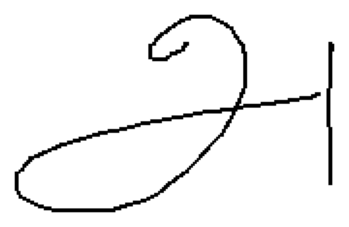

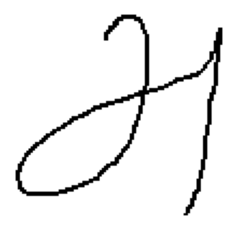

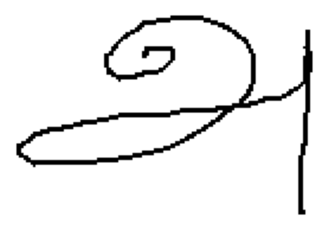

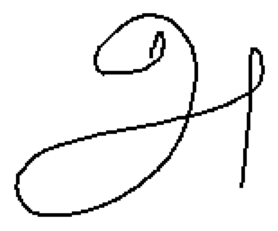

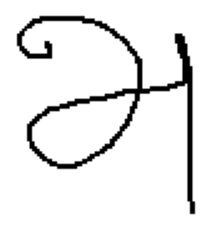

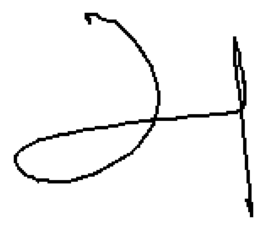

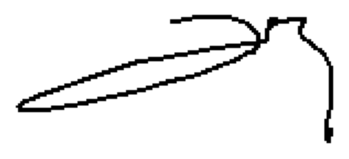

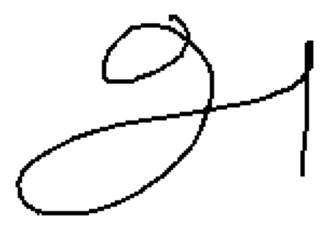

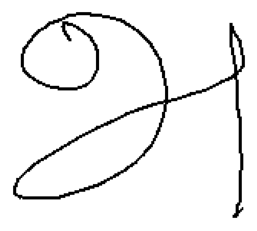

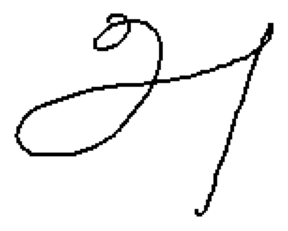

In [ ]:
show_character_image(0,training_dir,10)

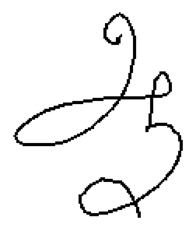

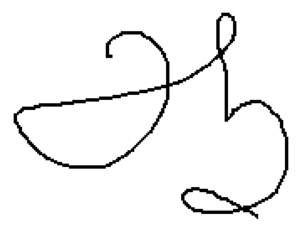

In [ ]:
show_character_image(1,training_dir,2)

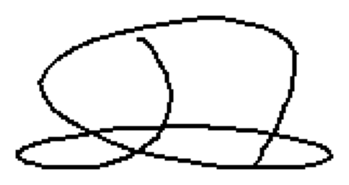

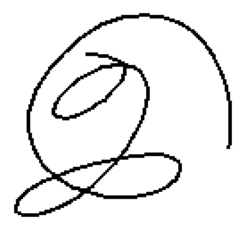

In [ ]:
show_character_image(2,training_dir,2)

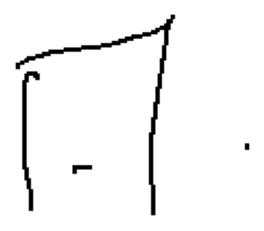

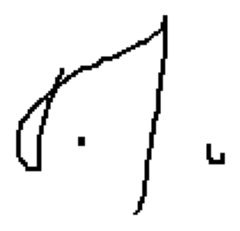

In [ ]:
show_character_image(3,training_dir,2)

In [ ]:

#normalize input which are in range [0,255] to [0,1] by using keras.preprocessing.image.ImageDataGenerator class using the rescale parameter 
train_datagen = ImageDataGenerator(rescale=1./255)

#The ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).
#Keep target_size=(128, 128) to resize all images to same size of(128,128)
#Keep class_mode='categorical' since we need multiclass labels
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(128, 128))

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
	testing_dir,
	target_size=(128,128),
	class_mode='categorical',
  batch_size=64
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 45544 images belonging to 156 classes.
Found 5139 images belonging to 156 classes.


We Will use transfer learning on InceptionV3 network as our model. Its good to use transfer laerning on well trained networks to get good results. Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. Since InceptionV3 is also trained for classification problem on millions of images it must have learned important features of image we will freeze the convolution layers to take advantage of the features it has learned already. we will add some dense layers at end which we will train for this specific task of tamil character recognition.

In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-02-17 08:57:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 74.125.31.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   190MB/s    in 0.4s    

2022-02-17 08:57:30 (190 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

In [ ]:
# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (128, 128, 3), 
                                include_top = False, 
                                weights = None)

In [ ]:
# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 63, 63, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

In [ ]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (156, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 63, 63, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                              

In [ ]:
# Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# Train the model.
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 712,
            epochs = 10,
            validation_steps = 81,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/10
712/712 - 1368s - loss: 1.2854 - accuracy: 0.6659 - val_loss: 0.5297 - val_accuracy: 0.8408 - 1368s/epoch - 2s/step
Epoch 2/10
712/712 - 1373s - loss: 0.4703 - accuracy: 0.8552 - val_loss: 0.5103 - val_accuracy: 0.8589 - 1373s/epoch - 2s/step
Epoch 3/10
712/712 - 1370s - loss: 0.3374 - accuracy: 0.8963 - val_loss: 0.5056 - val_accuracy: 0.8644 - 1370s/epoch - 2s/step
Epoch 4/10
712/712 - 1419s - loss: 0.2740 - accuracy: 0.9180 - val_loss: 0.4879 - val_accuracy: 0.8815 - 1419s/epoch - 2s/step
Epoch 5/10
712/712 - 1396s - loss: 0.2259 - accuracy: 0.9317 - val_loss: 0.5492 - val_accuracy: 0.8854 - 1396s/epoch - 2s/step
Epoch 6/10
712/712 - 1374s - loss: 0.1961 - accuracy: 0.9419 - val_loss: 0.5680 - val_accuracy: 0.8922 - 1374s/epoch - 2s/step
Epoch 7/10
712/712 - 1365s - loss: 0.1763 - accuracy: 0.9488 - val_loss: 0.6578 - val_accuracy: 0.8850 - 1365s/epoch - 2s/step
Epoch 8/10
712/712 - 1356s - loss: 0.1631 - accuracy: 0.9535 - val_loss: 0.6310 - val_accuracy: 0.8980 - 1356s/

In [ ]:
model.save('my_model.h5')

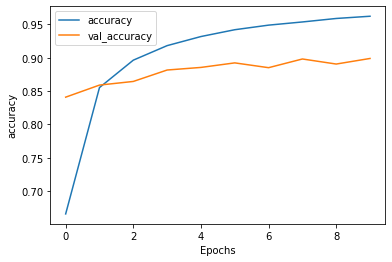

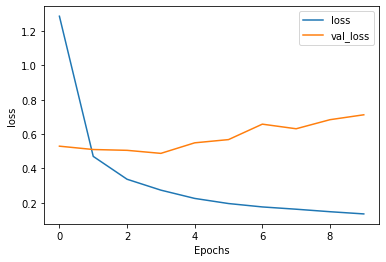

In [ ]:
import matplotlib.pyplot as plt

#plot graphs of accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Obtained Validation_Accuracy = 89.9%

Its not that high accuracy because of following reasons

1.   Isolated Tamil character recognition is a much harder problem because of  the larger category set of 156 classes and potential confusion due to similarity between handwritten characters.
2.   Unlike English many of the tamil characters will be similar which is the case in most Indian Languages like telugu,sanskrit,hindi. 
3.   I dont have access to high computational power, so have trained for only 10 epochs and also tried only few models and few range for hyperparameters. 

May be one can improve accuracy further by fine tuning learning_rate and drop_out_rate, number_of_neurons in final dense layer before softmax layer and also by using different optimizing algorithm like adam, sgd

In [ ]:
#The dictionary containing the mapping from class names(i.e name of subdirrectory which contain char) to class indices(i.e label of that char) can be obtained via train_generator.class_indices
print(train_generator.class_indices)

#make a new dictionary containing the mapping from class indices(labels) to class names(name of char sub-dir)
class_name_to_labels = train_generator.class_indices
labels_to_class_name = {}
for name in class_name_to_labels:
  labels_to_class_name[class_name_to_labels[name]] = name

print(labels_to_class_name)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128, 128))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  label = np.argmax(classes[0])
  class_name = labels_to_class_name[label]
  print(class_name)